# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

               RM       LSTAT     PTRATIO
count  489.000000  489.000000  489.000000
mean     6.240288   12.939632   18.516564
std      0.643650    7.081990    2.111268
min      3.561000    1.980000   12.600000
25%      5.880000    7.370000   17.400000
50%      6.185000   11.690000   19.100000
75%      6.575000   17.120000   20.200000
max      8.398000   37.970000   22.000000
Boston housing dataset has 489 data points with 4 variables each.


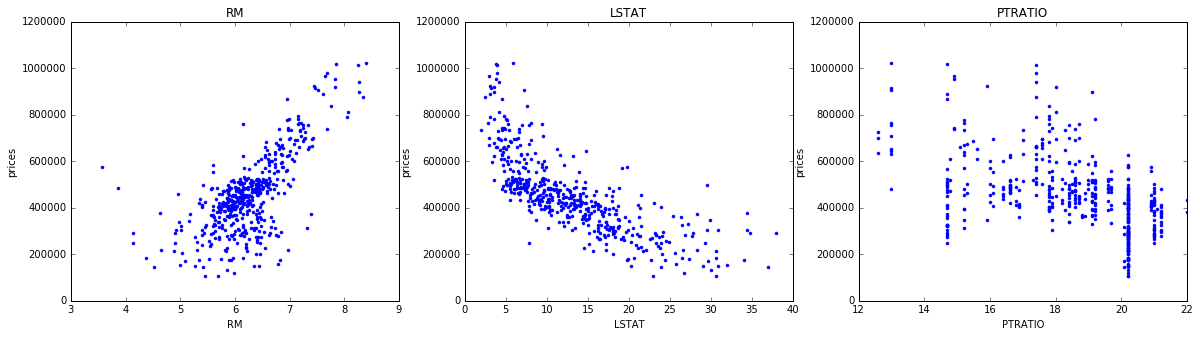

In [33]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print features.describe()
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(data[col], prices,'.')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')
    


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [19]:
# TODO: Minimum price of the data
minimum_price = prices.min()
minimum_price = np.min(prices)

# TODO: Maximum price of the data
#maximum_price = prices.max()
maximum_price = np.max(prices)

# TODO: Mean price of the data
#mean_price = prices.mean()
mean_price = np.mean(prices)

# TODO: Median price of the data
#median_price = prices.median()
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
#std_price = prices.std()
std_price = np.std(prices)

#*******************  hi if ound differnce between pandas std and numpy std can you explain it to me  *******************
# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
When RM value increases then MEDV also increases, because RM means average no.of rooms, when no.of rooms increases then usually house prices increases 

When LSTAT value increases then MEDV decreases, because LSTAT means homeowners with lower class, when people of lower class are more ,there is very high chance that the homes are of lower price as they can't pay much property tax etc

When PTRATIO is increases , then MEDV decreases, beacuse PTRATIo means students to teachers ratio, ratio increase means no.of students are high  when compared to no.of teachers this leads to reduction in price houses as there are less no.of teachers (when teachers are less people are not intrested to buy house in that area,as demand decreases,price decreases


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [34]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    print score
    # Return the score
    return score



### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [35]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

0.922855648536
Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
I think we need to have more values to evaluate the model

curently we have set of 5, and with the current dataset the model performs  well
co.efficient of determination is high and  nearly one , that means model is working well

so I conclude that model have successfully captured the variation of the target variable

when co-efficeint of variation is less then we have less error.

for example consider a 2D graph and a true values are plotted on it and our model draws a line of graph 
and the distnce between model's line and true values is less beacuse of this only we get co-efficents of determinents near to 1 that means the errors are small


### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [36]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

#print y_train
print features.shape
# Success
print "Training and testing split was successful."

(489, 3)
Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **
Yes,it is benifit to split data into some ratio of training and testing subsets for a learning algorithm
when you split the data into tarining and testing , you can work on training data to create a model 
and after completion of work, we can test our model with the test data to check it is good for use or not

if we take all data for training a model then we are not left with any data to test our model

if we test on our training data we will get always good result and we don't know how it functions on upcoming new data which is not desired. so we always  exclude some subset of data from training to test it


----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

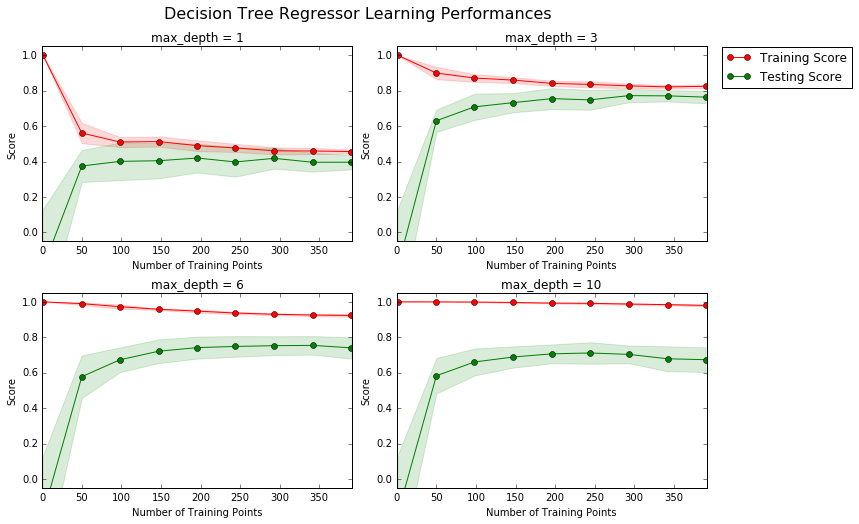

In [37]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **
I choose graph with max_depth 3,as more tarining points are added ,score of the training curve decreses and at one point it becomes almost stable (there might be some small variation)
As more testing points are added , score of the testing curve increases and at one point it becomes stable (there might be some small variation)
having more training points benifits the model upto some extend but if you add than a saturated level there will be no benifit

No I don't believe adding more data points to seletced model max_depth=3 

No benifit in adding more data points to selected model max depth=3

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

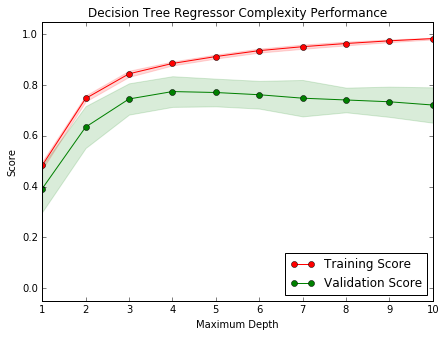

In [38]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
When the model is trained with a maximum depth of 1,the model has more bias 
When the model is trained with a maximum depth of 10,the model has more variance

when max depth is 1 then we get training score and validation score less ,that means model is not complex enough to learn from data, this less complex model that causes low scores is called more bias

When max depth is 10 then we get training score and testing score high , but there is some random noise beacuse of which there is gap between training curve and testing curve at depth 10 .this random noise is due to the complexity of underlying model
this high complexity of model that causes noise is called high variance



### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** from the above model complexity graph ,I think max depth 4 gives best results with model for unseen data
Max depth of 4 has less variance and less bias from graph we can see validation score at max depth 4 is close to training score
so less bias and validation score at max depth is close to its neightbouring validation score so less variance

although max depth of 3 has less bias it suffers from vaiance when compared to max depth 4


## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** grid search is a technique with which we can supply the different model with differnet parameters and then run the model with these varaitions and we will validate with the cross validation and take the best estimator that is best model with the best parameters combination
It can be applied to opitimize a learning algorithm to find the best max depth in our case when suppiled an array of 1 to n as depth we can find the depth at which learning curve is optimized 

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
K-fold cross validation technique means you will seperate data into k sets and
step 1 : - we will take 1 set as testing data and remaining as k-1 sets as training data and we will train model with training data (k-1 sets) and validate the model with testing data
we repeat the step 1 k times by taking another set as in k sets as testing set and remaing k-1 sets as training sets

This technique helps grid search alot for optimization.because in grid we iterate through different models with different params the training data. when we use cross validation then we are supplying different training sets which will further improve the model

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [39]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    
    
    grid = GridSearchCV(estimator=regressor,param_grid=params,cv=cv_sets,scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [40]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)
#print reg
# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

0.365760327663
0.50632287824
0.289374416662
0.206674024144
0.441012859035
0.377228139191
0.327002196032
0.46408313206
0.445820187574
0.498009448886
0.596455712486
0.61449527193
0.551644413704
0.457863358782
0.727678324477
0.646475501926
0.61657559601
0.692578535132
0.711942957451
0.73299922555
0.77496891417
0.693715045685
0.683941436565
0.609810798318
0.765226013963
0.785973638905
0.73976419724
0.782613385717
0.797696572139
0.82396998327
0.817556164156
0.737907830442
0.704025340159
0.662966146962
0.741796136904
0.763666357149
0.80567828907
0.809607637929
0.842435248589
0.863965249349
0.809264370841
0.731437899078
0.70706260164
0.671853983565
0.769148974052
0.774274587218
0.80493249823
0.754939096345
0.835389112253
0.865175501824
0.816848912621
0.70801576176
0.673855194355
0.674111720428
0.738740881041
0.764473004521
0.780222248068
0.77324841801
0.70854909966
0.830634157826
0.809328983287
0.70678453407
0.685050435827
0.656160494669
0.75978567134
0.762739214619
0.756704893609
0.762009401

**Answer: **
optimal model has the max depth of 4 , where as from question 6 I concluded that out of those 4 max depth of 3 has the omptimal model
my intution is almost correct and if we further increse depth of 3 i.e to 4 then we get more better model i.e optimal model

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67
               RM       LSTAT     PTRATIO
count  489.000000  489.000000  489.000000
mean     6.240288   12.939632   18.516564
std      0.643650    7.081990    2.111268
min      3.561000    1.980000   12.600000
25%      5.880000    7.370000   17.400000
50%      6.185000   11.690000   19.100000
75%      6.575000   17.120000   20.200000
max      8.398000   37.970000   22.000000


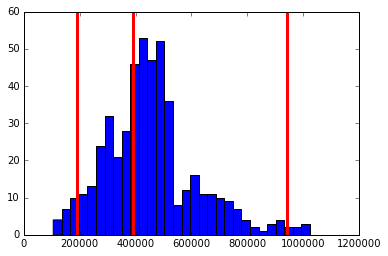

In [48]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

print features.describe()

plt.hist(prices, bins = 30)
for price in reg.predict(client_data):
    plt.axvline(price, c = 'r', lw = 3)

**Answer: **
Yes I recommend these prices although the model is not robust  ()
from the stats and graph above we can recommend the prices
 
 for example consider client 3 - 8 rooms,3% poverty ,12-1 ratio
 
 8 rooms more than 75%  -- means price might be more than 75%
 3% poverty less than 25%  -- means price might be more than 75% (reverse)
 12-1 less than 25%  -- means price might be more than 75% (reverse)
 
 and our prediction is also more than 75% - so we can recommend this prediction
 
 ( I have a doubt here I am recommending prices but in next question I am saying model is not robust which means model is not good for predictions )

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [62]:
vs.PredictTrials(features, prices, fit_model, client_data)

0.365760327663
0.50632287824
0.289374416662
0.206674024144
0.441012859035
0.377228139191
0.327002196032
0.46408313206
0.445820187574
0.498009448886
0.596455712486
0.61449527193
0.551644413704
0.457863358782
0.727678324477
0.646475501926
0.61657559601
0.692578535132
0.711942957451
0.73299922555
0.77496891417
0.693715045685
0.683941436565
0.609810798318
0.765226013963
0.785973638905
0.73976419724
0.782613385717
0.797696572139
0.82396998327
0.817556164156
0.737907830442
0.704025340159
0.662966146962
0.741796136904
0.763666357149
0.80567828907
0.809607637929
0.842435248589
0.863965249349
0.809264370841
0.730634786336
0.70706260164
0.671853983565
0.763204651756
0.74827346237
0.80493249823
0.754939096345
0.835389112253
0.866498041063
0.813421644752
0.710953237658
0.670499548089
0.674111720428
0.746207209706
0.78188407955
0.775205982244
0.772735537108
0.711382322792
0.82905970635
0.795886477091
0.685202936738
0.63802825566
0.658706255991
0.752585353805
0.776776757666
0.818019304098
0.78731286

### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

Data from 1978 is  relavent today.but some more factors also help
 

upto some extent these values good , but we need some more features such age of the house
so for me these values are  suffiecient as we scaled out for market infaltion
se can use our intution with age of house and refactor the predicted output prices while recommending the price to clients

No the model is not consistent enough to make the predictions beacuse of its range more than $60,000 for house of client 1
which is too high.so model is not robust for consistent precitions as it will give different values


No,data from urban city can't be applicable to a rural city .beacuse land prices will vary huge between urban and rural areas and construction costs are also differnt so boston data can't be applied to rural cities
urban city market inflation is high when compared to inflation in rural cities

I will not use model in real world secenario beacuse it is not consistent it has a range more than 60,000 dollars for client 1 when we used predict trails function. so your answer might have > $60,000 speculation 
Hence I will not recommend this model
